<a href="https://colab.research.google.com/github/iba-xm/datascience/blob/main/PretrainedModels_Classification(KCN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception, ResNet50, MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import zipfile
import os

# Define constants
image_height = 224
image_width = 224
batch_size = 32
epochs = 10

# Specify the path to the zip file
zip_file_path = '/content/Keratoconus Dataset.zip'

# Specify the destination folders
destination_folder_1 = '/content/Independent Test Set'
destination_folder_2 = '/content/Train_Validation sets'

# Create destination folders if they don't exist
os.makedirs(destination_folder_1, exist_ok=True)
os.makedirs(destination_folder_2, exist_ok=True)

# Extract contents of the zip file to the destination folders
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder_1)
    zip_ref.extractall(destination_folder_2)

print("Extraction completed.")

# Define paths to image directories
train_dir = '/content/Train_Validation sets/Train_Validation sets/Train_Validation sets'
test_dir = '/content/Train_Validation sets/Independent Test Set/Independent Test Set'



Extraction completed.


Visualization of Classes

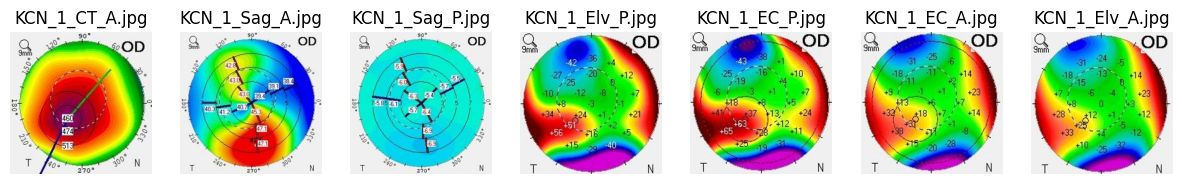

In [2]:
import matplotlib.image as mpimg
# Define the path to the KCNcase1 folder
case1_path1 = '/content/Train_Validation sets/Train_Validation sets/Train_Validation sets/Keratoconus/case1'

# List files in the case1 folder
case1_kcn = os.listdir(case1_path1)

# Plot all the images
fig, axes = plt.subplots(1, len(case1_kcn), figsize=(15, 5))

for i, file_name in enumerate(case1_kcn):
    # Read the image
    img = mpimg.imread(os.path.join(case1_path1, file_name))
    # Plot the image
    axes[i].imshow(img)
    axes[i].set_title(file_name)
    axes[i].axis('off')

plt.show()

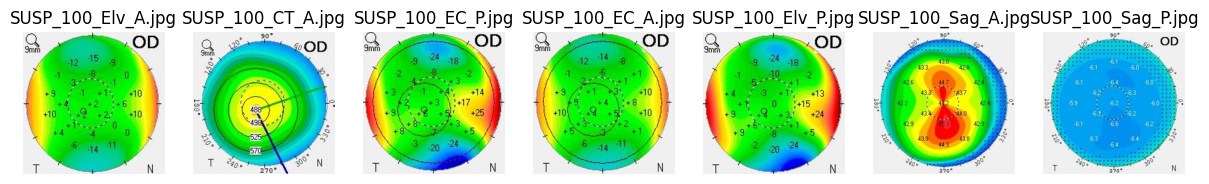

In [3]:
# Define the path to the SUScase1 folder
case1_path2 = '/content/Train_Validation sets/Train_Validation sets/Train_Validation sets/Suspect/case100'

# List files in the case1 folder
case1_sus = os.listdir(case1_path2)

# Plot all the images
fig, axes = plt.subplots(1, len(case1_sus), figsize=(15, 5))

for i, file_name in enumerate(case1_sus):
    # Read the image
    img = mpimg.imread(os.path.join(case1_path2, file_name))
    # Plot the image
    axes[i].imshow(img)
    axes[i].set_title(file_name)
    axes[i].axis('off')

plt.show()

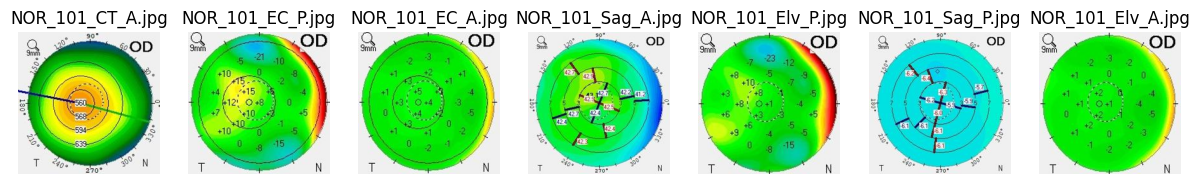

In [4]:
# Define the path to the NORMcase1 folder
case1_path3 = '/content/Train_Validation sets/Train_Validation sets/Train_Validation sets/Normal/case101'

# List files in the case1 folder
case1_norm = os.listdir(case1_path3)

# Plot all the images
fig, axes = plt.subplots(1, len(case1_norm), figsize=(15, 5))

for i, file_name in enumerate(case1_norm):
    # Read the image
    img = mpimg.imread(os.path.join(case1_path3, file_name))
    # Plot the image
    axes[i].imshow(img)
    axes[i].set_title(file_name)
    axes[i].axis('off')

plt.show()

In [10]:
# Define the path to the NORMcase1 folder
case1_path3 = '/content/Train_Validation sets/Train_Validation sets/Train_Validation sets/Normal/case101'

# List files in the case1 folder
case1_norm = os.listdir(case1_path2)  # Here, case1_path2 is not defined, you probably meant case1_path3

print(case1_path3)
print(case1_norm)


/content/Train_Validation sets/Train_Validation sets/Train_Validation sets/Normal/case101
['SUSP_100_Elv_A.jpg', 'SUSP_100_CT_A.jpg', 'SUSP_100_EC_P.jpg', 'SUSP_100_EC_A.jpg', 'SUSP_100_Elv_P.jpg', 'SUSP_100_Sag_A.jpg', 'SUSP_100_Sag_P.jpg']


#Applying Image Filter for Feature Extraction

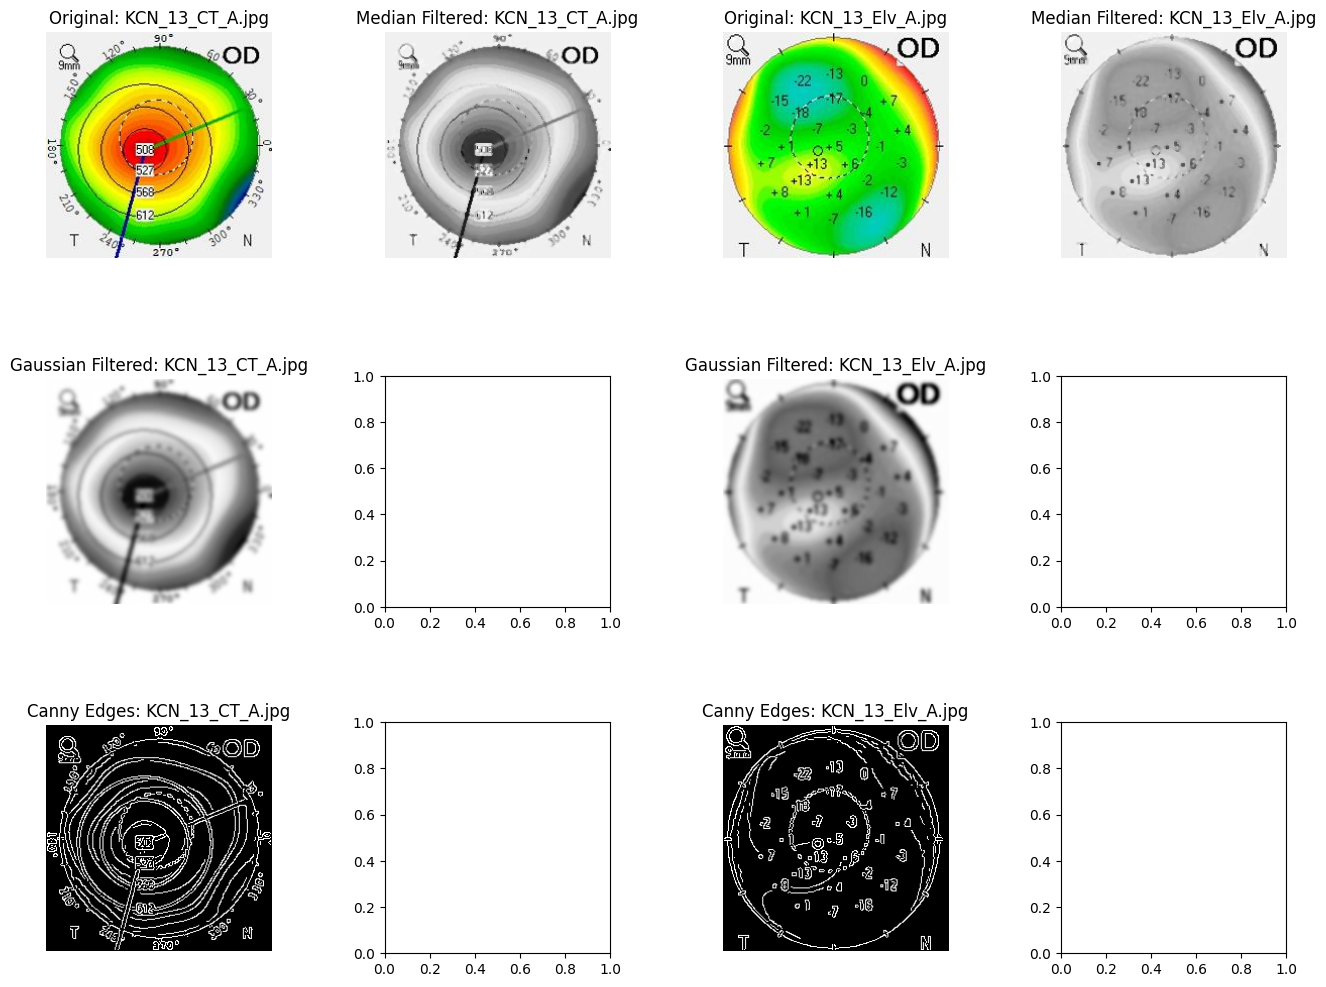

In [13]:
import os
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian, median
from skimage.feature import canny

# Set the input directory
train_dir = '/content/Train_Validation sets/Independent Test Set/Independent Test Set/Keratoconus/case13'

# Create a figure with 3x4 subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

# Loop through the files in the input directory
i = 0
for filename in os.listdir(train_dir):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(train_dir, filename)
        image = plt.imread(image_path)

        # Convert the image to grayscale
        gray_image = rgb2gray(image)

        # Apply the Gaussian filter
        gaussian_filtered_image = gaussian(gray_image, sigma=2)

        # Apply the Canny Edge filter
        canny_edges = canny(gray_image)

        # Apply the Median filter
        median_filtered_image = median(gray_image)

        # Display the original and filtered images
        if i < 4:  # Check if the index is within the available subplots
            ax = axes[0, i]
            ax.imshow(image, cmap='gray')
            ax.set_title(f'Original: {filename}')
            ax.axis('off')

            ax = axes[1, i]
            ax.imshow(gaussian_filtered_image, cmap='gray')
            ax.set_title(f'Gaussian Filtered: {filename}')
            ax.axis('off')

            ax = axes[2, i]
            ax.imshow(canny_edges, cmap='gray')
            ax.set_title(f'Canny Edges: {filename}')
            ax.axis('off')

            i += 1

            if i < 4:  # Check if the index is within the available subplots
                ax = axes[0, i]
                ax.imshow(median_filtered_image, cmap='gray')
                ax.set_title(f'Median Filtered: {filename}')
                ax.axis('off')

                i += 1
        else:
            break  # Exit the loop if all subplots are filled

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Display the figure
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def subtract_median_bg_image(im):
    k = np.max(im.shape)//20*2+1
    bg = cv2.medianBlur(im, k)
    return cv2.addWeighted(im, 4, bg, -4, 128)

def subtract_gaussian_bg_image(im):
    k = np.max(im.shape)/10
    bg = cv2.GaussianBlur(im, (0, 0), k)
    return cv2.addWeighted(im, 4, bg, -4, 128)

def adjust_gamma(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def contrast_stretching(img):
    rr, gg, bb = cv2.split(img)
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    im = imgray
    ih, iw = imgray.shape
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(imgray)
    for i in range(ih):
        for j in range(iw):
            im[i, j] = 255 * ((gg[i, j] - minVal) / (maxVal - minVal))
    limg = cv2.merge((rr, im, bb))
    return limg

def histogram_normalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    img2 = cdf[image]
    return img2

def diffed_imgs_plt(img1, img2, out_path='file.jpg', cont=False, hist=False):
    img1 = np.array(img1)
    img2 = np.array(img2)
    out = np.zeros_like(img1)
    diff = np.abs(img1.astype(np.int32) - img2.astype(np.int32))
    out[diff > 0] = 255
    if out_path:
        cv2.imwrite(out_path, out)
    final = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    if cont:
        try:
            final = contrast_stretching(final)
        except:
            pass
    if hist:
        try:
            final = histogram_normalization(final)
        except:
            pass
    plt.imshow(final)

def Root_Channel_SQUR(crop):
    blu = crop[:, :, 0].astype(np.int32)
    gre = crop[:, :, 1].astype(np.int32)
    red = crop[:, :, 2].astype(np.int32)
    lll = (((blu**2) + (gre**2) + (red**2)) / float(3))**0.5
    lll = lll.astype(np.uint8)
    return lll

def Krischer(crop):
    Input = crop[:, :, 1]
    a, b = Input.shape
    Kernel = np.zeros((3, 3, 8))  # windows declarations (8 windows)
    Kernel[:, :, 0] = np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]])
    Kernel[:, :, 1] = np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]])
    Kernel[:, :, 2] = np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]])
    Kernel[:, :, 3] = np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]])
    Kernel[:, :, 4] = np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]])
    Kernel[:, :, 5] = np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]])
    Kernel[:, :, 6] = np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]])
    Kernel[:, :, 7] = np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]])
    dst = np.zeros((a, b, 8))
    for x in range(0, 8):
        dst[:, :, x] = cv2.filter2D(Input, -1, Kernel[:, :, x])
    Out = np.zeros((a, b))
    for y in range(0, a - 1):
        for z in range(0, b - 1):
            Out[y, z] = max(dst[y, z, :])
    Out = np.uint8(Out)
    return Out

def Tan_inv(crop):
    gre = crop[:, :, 1].astype(np.float64)
    red = crop[:, :, 2].astype(np.float64)
    red[red == 0] = 0.000001
    m = gre / red
    n = np.arctan(m)
    ij = (n * 255) / 3.14
    j = ij.astype(np.uint8)
    equ = cv2.equalizeHist(j)
    return equ


<ipython-input-8-c382d21d367a>:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


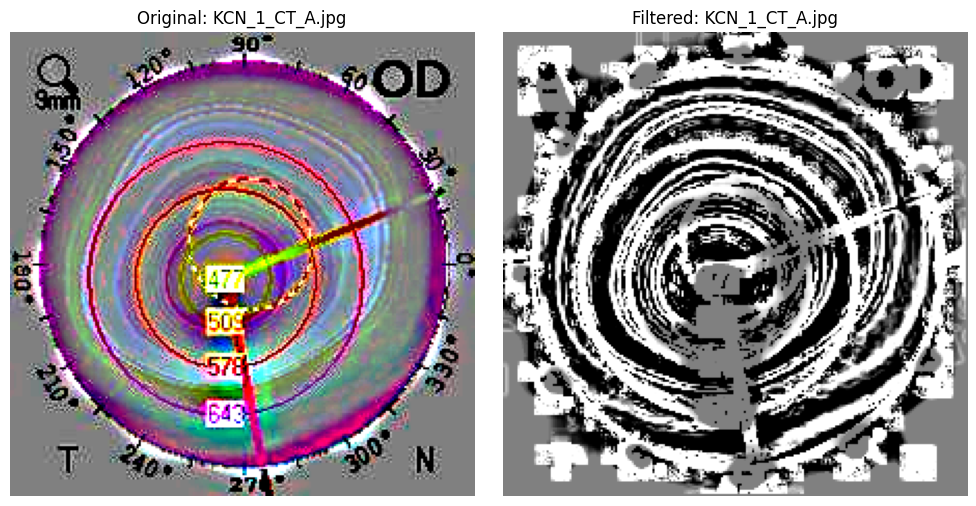

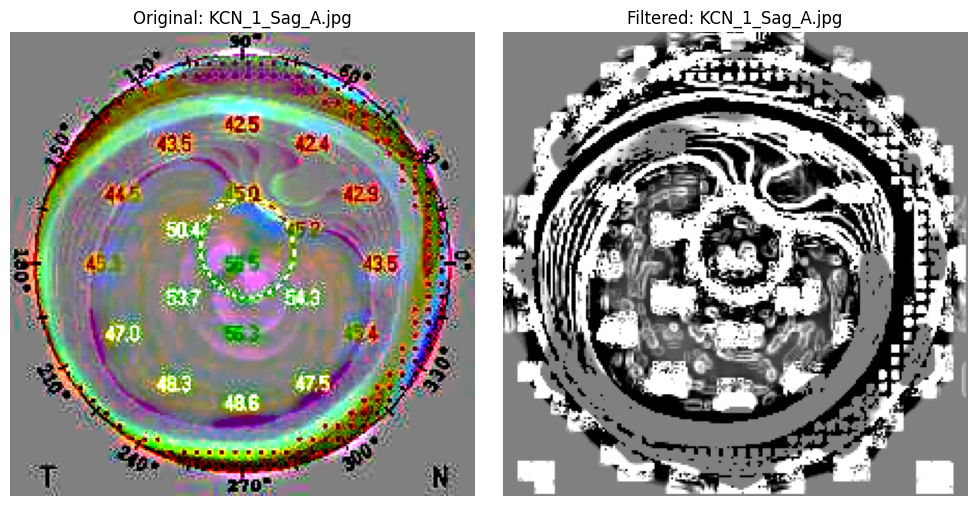

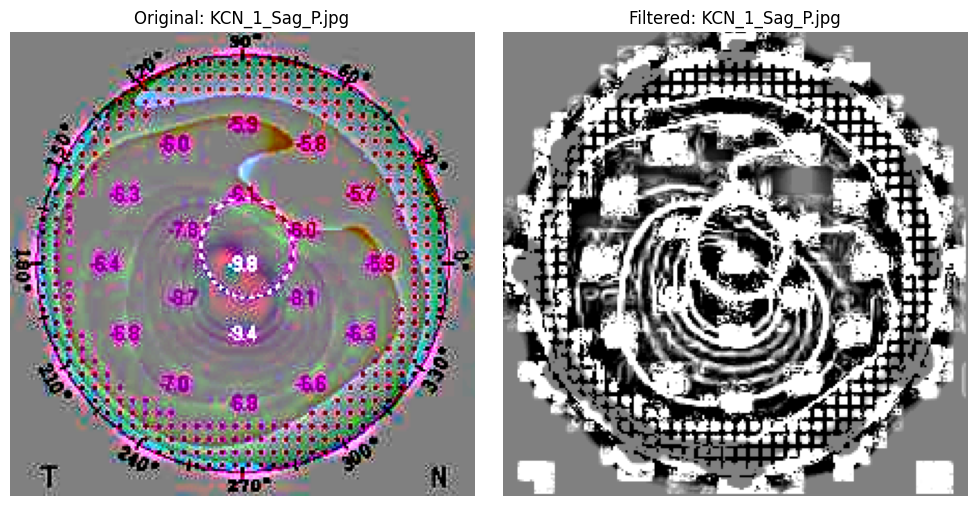

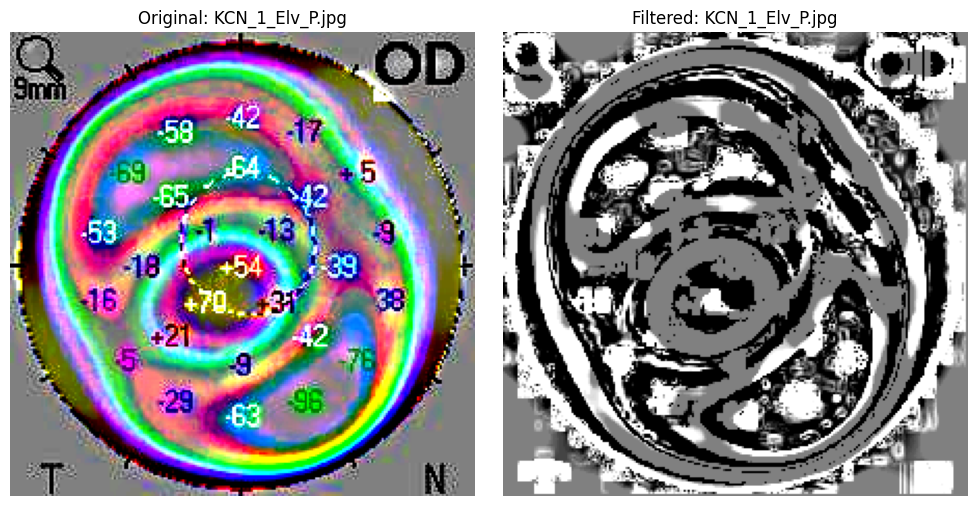

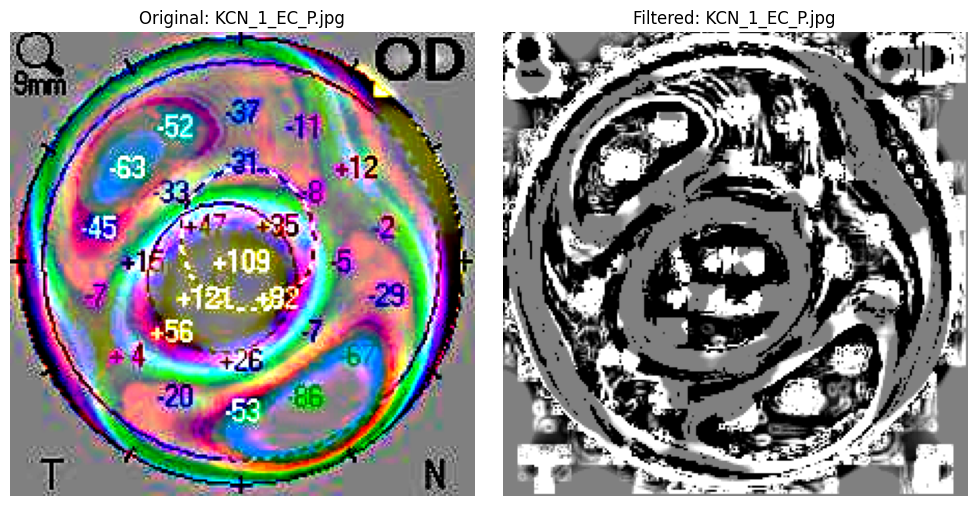

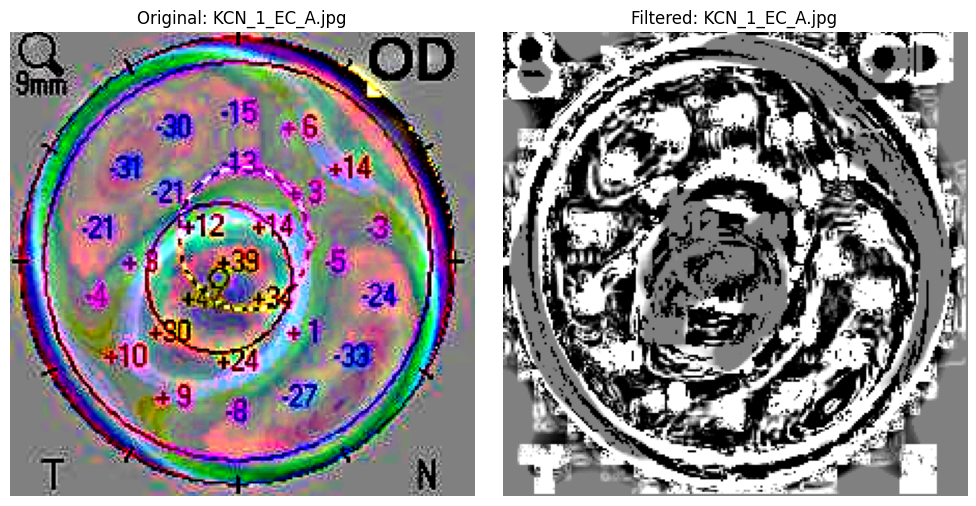

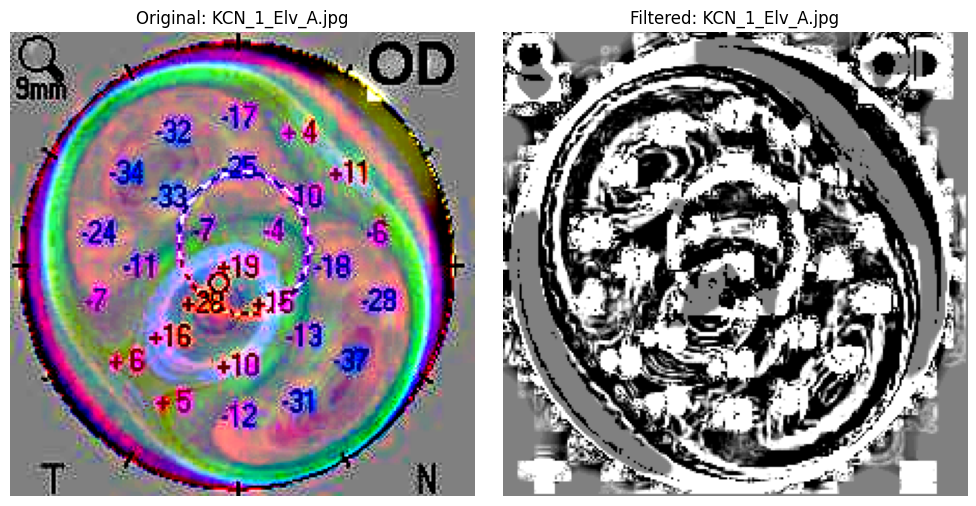

In [ ]:
# Set the path to the folder containing the images
folder_path = '/content/Train_Validation sets/Independent Test Set/Independent Test Set/Keratoconus/case1'

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)

        # Read the image
        im = cv2.imread(file_path)

        # Apply the Krischer filter
        Krisch = Krischer(im)

        # Subtract the median background from the original and filtered images
        im = subtract_median_bg_image(im)
        Krisch = subtract_median_bg_image(Krisch)

        # Display the original and filtered images
        fig, ax = plt.subplots(figsize=(10, 5))
        plt.subplot(121)
        plt.imshow(im, cmap='gray')
        plt.title(f'Original: {filename}')
        plt.axis('off')

        plt.subplot(122)
        plt.imshow(Krisch, cmap='gray')
        plt.title(f'Filtered: {filename}')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

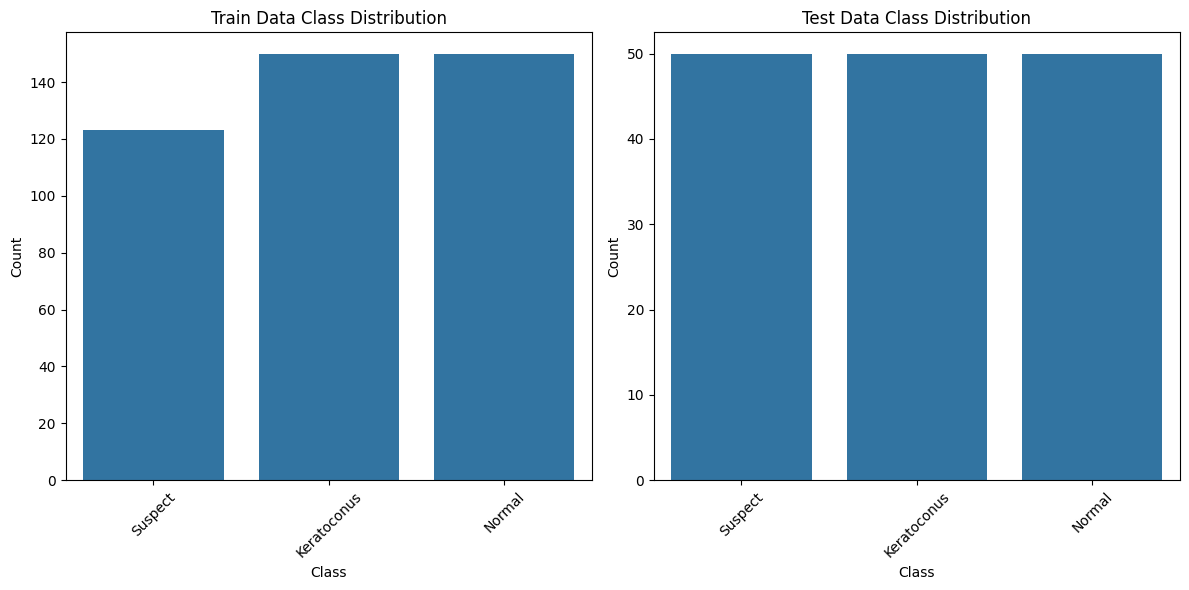

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define paths to image directories
train_dir = '/content/Train_Validation sets/Train_Validation sets/Train_Validation sets'
test_dir = '/content/Train_Validation sets/Independent Test Set/Independent Test Set'

train_df = pd.DataFrame(columns=['Class', 'Count'])
test_df = pd.DataFrame(columns=['Class', 'Count'])

for folder in os.listdir(train_dir):
    if os.path.isdir(os.path.join(train_dir, folder)):
        train_df = pd.concat([train_df, pd.DataFrame({'Class': [folder], 'Count': [len(os.listdir(os.path.join(train_dir, folder)))]})])

for folder in os.listdir(test_dir):
    if os.path.isdir(os.path.join(test_dir, folder)):
        test_df = pd.concat([test_df, pd.DataFrame({'Class': [folder], 'Count': [len(os.listdir(os.path.join(test_dir, folder)))]})])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=train_df, x='Class', y='Count')
plt.title('Train Data Class Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=test_df, x='Class', y='Count')
plt.title('Test Data Class Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Use ImageDataGenerator to load images from directories and rescale them
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and augment training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Load and augment test images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



Found 2961 images belonging to 3 classes.
Found 1050 images belonging to 3 classes.


In [ ]:
# Load pre-trained Xception model without top (fully connected) layers
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Load pre-trained ResNet50 model without top layers
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Load pre-trained MobileNetV2 model without top layers
mobilenetv2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Freeze the base model layers
xception_base.trainable = False
resnet50_base.trainable = False
mobilenetv2_base.trainable = False

# Add custom top layers for multi-class classification
xception_model = Sequential([
    xception_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: 'keratoconus', 'suspect', 'normal'
])

resnet50_model = Sequential([
    resnet50_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

mobilenetv2_model = Sequential([
    mobilenetv2_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the models
xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mobilenetv2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models
xception_history = xception_model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // batch_size
)

resnet50_history = resnet50_model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // batch_size
)

mobilenetv2_history = mobilenetv2_model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // batch_size
)


Epoch 1/10
92/92 [==============================] - 854s 9s/step - loss: 0.8080 - accuracy: 0.6050 - val_loss: 1.0688 - val_accuracy: 0.5479
Epoch 2/10
92/92 [==============================] - 885s 10s/step - loss: 0.6835 - accuracy: 0.6815 - val_loss: 1.1031 - val_accuracy: 0.5586
Epoch 3/10
92/92 [==============================] - 874s 10s/step - loss: 0.6620 - accuracy: 0.6924 - val_loss: 1.0755 - val_accuracy: 0.5586
Epoch 4/10
92/92 [==============================] - 878s 10s/step - loss: 0.5936 - accuracy: 0.7351 - val_loss: 1.3025 - val_accuracy: 0.5264
Epoch 5/10
92/92 [==============================] - 825s 9s/step - loss: 0.5875 - accuracy: 0.7299 - val_loss: 1.2922 - val_accuracy: 0.5303
Epoch 6/10
92/92 [==============================] - 876s 10s/step - loss: 0.5594 - accuracy: 0.7361 - val_loss: 1.2933 - val_accuracy: 0.5283
Epoch 7/10
92/92 [==============================] - 839s 9s/step - loss: 0.5387 - accuracy: 0.7521 - val_loss: 1.2897 - val_accuracy: 0.5361
Epoch 8/1

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, fbeta_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [ ]:
# Evaluate Xception model
xception_scores = xception_model.evaluate(test_generator)
xception_predictions = xception_model.predict(test_generator)
xception_pred_labels = np.argmax(xception_predictions, axis=1)
xception_true_labels = test_generator.classes

# Evaluate ResNet50 model
resnet50_scores = resnet50_model.evaluate(test_generator)
resnet50_predictions = resnet50_model.predict(test_generator)
resnet50_pred_labels = np.argmax(resnet50_predictions, axis=1)

# Evaluate MobileNetV2 model
mobilenetv2_scores = mobilenetv2_model.evaluate(test_generator)
mobilenetv2_predictions = mobilenetv2_model.predict(test_generator)
mobilenetv2_pred_labels = np.argmax(mobilenetv2_predictions, axis=1)

# Define function to calculate F2 score
def f2_score(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f2 = (5 * sensitivity * specificity) / (4 * sensitivity + specificity)
    return f2

# Calculate F2 scores
xception_f2 = f2_score(xception_true_labels, xception_pred_labels)
resnet50_f2 = f2_score(xception_true_labels, resnet50_pred_labels)
mobilenetv2_f2 = f2_score(xception_true_labels, mobilenetv2_pred_labels)

# Calculate AUC with 'ovr' strategy
xception_auc = roc_auc_score(xception_true_labels, xception_predictions, multi_class='ovr')
resnet50_auc = roc_auc_score(xception_true_labels, resnet50_predictions, multi_class='ovr')
mobilenetv2_auc = roc_auc_score(xception_true_labels, mobilenetv2_predictions, multi_class='ovr')

# Print evaluation metrics
print("Xception:")
print("Accuracy:", xception_scores[1])
print("F2 Score:", xception_f2)
print("AUC:", xception_auc)
print("\nResNet50:")
print("Accuracy:", resnet50_scores[1])
print("F2 Score:", resnet50_f2)
print("AUC:", resnet50_auc)
print("\nMobileNetV2:")
print("Accuracy:", mobilenetv2_scores[1])
print("F2 Score:", mobilenetv2_f2)
print("AUC:", mobilenetv2_auc)

# Plot confusion matrices
def plot_confusion_matrix(cm, classes, model_name):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.show()

# Plot confusion matrices for each model
xception_cm = confusion_matrix(xception_true_labels, xception_pred_labels)
resnet50_cm = confusion_matrix(xception_true_labels, resnet50_pred_labels)
mobilenetv2_cm = confusion_matrix(xception_true_labels, mobilenetv2_pred_labels)

plot_confusion_matrix(xception_cm, ['keratoconus', 'suspect', 'normal'], 'Xception')
plot_confusion_matrix(resnet50_cm, ['keratoconus', 'suspect', 'normal'], 'ResNet50')
plot_confusion_matrix(mobilenetv2_cm, ['keratoconus', 'suspect', 'normal'], 'MobileNetV2')

# Plot ROC curves
def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(xception_true_labels, xception_predictions[:, 1], 'Xception')
plot_roc_curve(xception_true_labels, resnet50_predictions[:, 1], 'ResNet50')
plot_roc_curve(xception_true_labels, mobilenetv2_predictions[:, 1], 'MobileNetV2')


33/33 [==============================] - 41s 1s/step


ValueError: multi_class must be in ('ovo', 'ovr')

Xception:
Accuracy: 0.5523809790611267
F2 Score: 0.9748961768992231
AUC: 0.739617006802721

ResNet50:
Accuracy: 0.5133333206176758
F2 Score: 0.6548744584599919
AUC: 0.7274523809523811

MobileNetV2:
Accuracy: 0.583809494972229
F2 Score: 0.9492208295020084
AUC: 0.7501795918367348


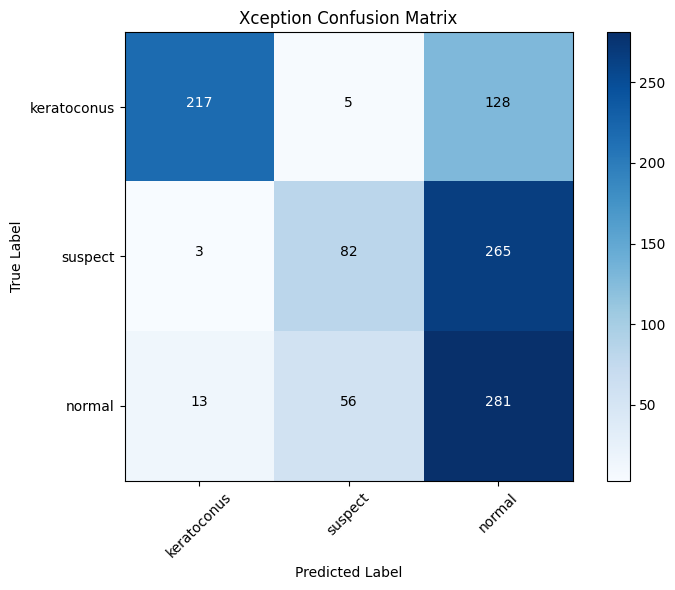

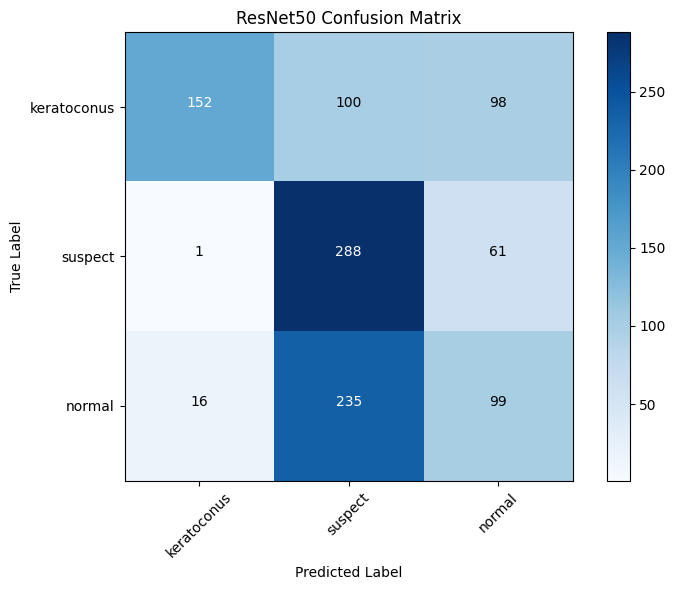

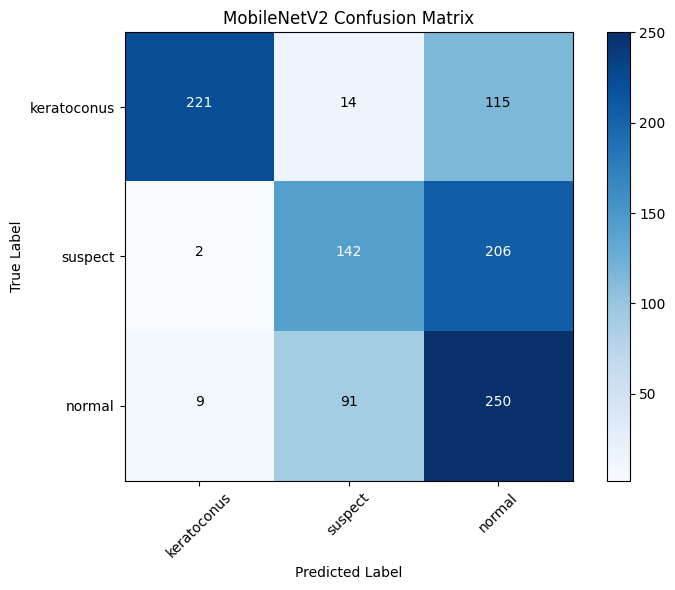

In [ ]:
# Calculate AUC with 'ovr' strategy
xception_auc = roc_auc_score(xception_true_labels, xception_predictions, multi_class='ovr')
resnet50_auc = roc_auc_score(xception_true_labels, resnet50_predictions, multi_class='ovr')
mobilenetv2_auc = roc_auc_score(xception_true_labels, mobilenetv2_predictions, multi_class='ovr')

# Print evaluation metrics
print("Xception:")
print("Accuracy:", xception_scores[1])
print("F2 Score:", xception_f2)
print("AUC:", xception_auc)
print("\nResNet50:")
print("Accuracy:", resnet50_scores[1])
print("F2 Score:", resnet50_f2)
print("AUC:", resnet50_auc)
print("\nMobileNetV2:")
print("Accuracy:", mobilenetv2_scores[1])
print("F2 Score:", mobilenetv2_f2)
print("AUC:", mobilenetv2_auc)

# Plot confusion matrices
def plot_confusion_matrix(cm, classes, model_name):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.show()

# Plot confusion matrices for each model
xception_cm = confusion_matrix(xception_true_labels, xception_pred_labels)
resnet50_cm = confusion_matrix(xception_true_labels, resnet50_pred_labels)
mobilenetv2_cm = confusion_matrix(xception_true_labels, mobilenetv2_pred_labels)

plot_confusion_matrix(xception_cm, ['keratoconus', 'suspect', 'normal'], 'Xception')
plot_confusion_matrix(resnet50_cm, ['keratoconus', 'suspect', 'normal'], 'ResNet50')
plot_confusion_matrix(mobilenetv2_cm, ['keratoconus', 'suspect', 'normal'], 'MobileNetV2')



In [ ]:
from sklearn.metrics import classification_report

# Calculate Sensitivity and Specificity
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    return sensitivity, specificity

# Calculate sensitivity, specificity, and classification report
def evaluate_model(y_true, y_pred, model_name):
    sensitivity, specificity = calculate_sensitivity_specificity(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred)

    print(f"{model_name}:")
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    print("Classification Report:")
    print(classification_rep)

# Evaluate each model
evaluate_model(xception_true_labels, xception_pred_labels, "Xception")
evaluate_model(xception_true_labels, resnet50_pred_labels, "ResNet50")
evaluate_model(xception_true_labels, mobilenetv2_pred_labels, "MobileNetV2")



Xception:
Sensitivity: 0.9647058823529412
Specificity: 0.9774774774774775
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.62      0.74       350
           1       0.57      0.23      0.33       350
           2       0.42      0.80      0.55       350

    accuracy                           0.55      1050
   macro avg       0.64      0.55      0.54      1050
weighted avg       0.64      0.55      0.54      1050

ResNet50:
Sensitivity: 0.9965397923875432
Specificity: 0.6031746031746031
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.43      0.59       350
           1       0.46      0.82      0.59       350
           2       0.38      0.28      0.33       350

    accuracy                           0.51      1050
   macro avg       0.58      0.51      0.50      1050
weighted avg       0.58      0.51      0.50      1050

MobileNetV2:
Sensitivity: 0.9861111111111112

In [ ]:
import joblib

# Assuming your trained model is named 'model'
# Replace 'model' with the name of your trained model

# Save the model to a file
joblib.dump(model, 'PretrainedClassification(KCN).pk1')


In [ ]:
# Load the model from the file
loaded_model = joblib.load('PretrainedClassification(KCN).pk1')
